In [3]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt

This script runs examples on Gr(1,2).


TODO:

    -axis labels and comments on robustness check
    


In [4]:
#number of points in each class
num1 = 10
num2 = 10
num3 = 10

#bonus class where we can define mean and standard deviation
numn = 0
n_std = .1
n_mean = .5

#standard deviation of each cluster
std =.01

#random number seed
seed = 1

#points in Gr(k,n)
k=1

#number of iterations for FlagIRLS
n_its = 1000

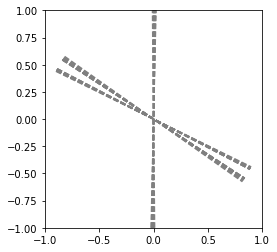

In [5]:
#Data Loading

#keep this at 0
np.random.seed(0)

data_array = []
if num1 != 0:
    data_array = np.vstack([np.random.normal(0, std, num1), np.random.normal(1, std, num1)])
if num2 != 0:
    Process2 = np.vstack([np.random.normal(.66, std, num2), np.random.normal(-.44, std, num2)])
    data_array = np.hstack([data_array, Process2])
if num3 != 0:
    Process3 = np.vstack([np.random.normal(.66, std, num3), np.random.normal(-.33, std, num3)])
    data_array = np.hstack([data_array, Process3])
if numn != 0:
    Processn = np.vstack([np.random.normal(1-n_mean, n_std, numn), np.random.normal(n_mean, n_std, numn)])
    if data_array != []:
        data_array = np.hstack([data_array, Processn])
    else:
        data_array = Processn
        

fig = plt.figure()
ax = fig.add_subplot(111)

gr_list = []
for i in range(data_array.shape[1]):
    point = data_array[:,[i]]
    gr_list.append(point/np.linalg.norm(point))
    plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.5', linestyle = 'dashed')

plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_aspect('equal')

In [6]:
#calculate flagmean
flagmean = ca.flag_mean(gr_list, k, fast = False)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, k, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate geodesic median
geodesic_median, g_err = ca.irls_flag(gr_list, k, n_its, 'geodesic', opt_err = 'geodesic', fast = False, seed = seed)
print('Geodesic finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')

Flag Mean finished
Sine Median finished
Geodesic finished
Max Cos finished


Text(0.5, 0, 'iteration')

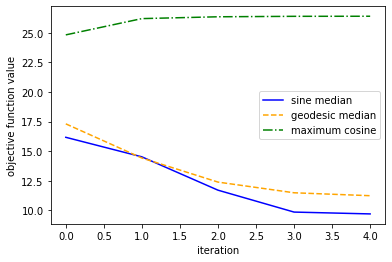

In [8]:
#convergence plot using geodesic distance error
plt.plot(s_err[:5], label = 'sine median', color = 'blue', linestyle = 'solid')
plt.plot(g_err[:5], label = 'geodesic median', color = 'orange', linestyle = 'dashed')
plt.plot(c_err[:5], label = 'maximum cosine', color = 'green', linestyle = 'dashdot')

plt.legend()
plt.ylabel('objective function value')
plt.xlabel('iteration')

In [8]:
#sample objective function values for points with in 100 degrees from [1,0]

sinsq_err = []
sin_err = []
geo_err = []
cos_err = []
thetas = []
Ys = np.vstack([np.random.normal(1, .5, 500), np.random.normal(0, .5, 500)])

sample_list = []
for i in range(-320,320,1):
    theta = i/200
    thetas.append(theta)
    point = np.array([[np.cos(theta)], [np.sin(theta)]])
    sample_list.append(point/np.linalg.norm(point))
    
for Y in sample_list:
#     print(Y.shape)
    sinsq_err.append(ca.calc_error_1_2(gr_list, Y, 'sinesq'))
    sin_err.append(ca.calc_error_1_2(gr_list, Y, 'sine'))
    geo_err.append(ca.calc_error_1_2(gr_list, Y, 'geodesic'))
    cos_err.append(ca.calc_error_1_2(gr_list, Y, 'cosine'))

Text(0, 0.5, 'Objective Function Value')

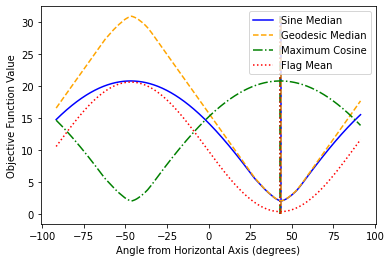

In [9]:
#objective function value plots

thetas_degrees = [t*180/np.pi for t in thetas]

v_line_top = np.max([np.max(sin_err), np.max(geo_err), np.max(cos_err), np.max(sinsq_err)])
v_line_top = np.max([np.max(sin_err), np.max(geo_err), np.max(cos_err), np.max(sinsq_err)])


plt.plot(thetas_degrees, sin_err, label = 'Sine Median', color = 'blue', linestyle = 'solid')
plt.plot(thetas_degrees, geo_err, label = 'Geodesic Median', color = 'orange', linestyle = 'dashed')
plt.plot(thetas_degrees, cos_err, label = 'Maximum Cosine', color = 'green', linestyle = 'dashdot')
plt.plot(thetas_degrees, sinsq_err, label = 'Flag Mean', color = 'red', linestyle = 'dotted')
plt.vlines(np.arctan(sin_median[1]/sin_median[0])*180/np.pi, 0, v_line_top, color = 'blue', linestyle = 'solid')
plt.vlines(np.arctan(geodesic_median[1]/geodesic_median[0])*180/np.pi, 0, v_line_top, color = 'orange', linestyle = 'dashed')
plt.vlines(np.arctan(max_cosine[1]/max_cosine[0])*180/np.pi, 0, v_line_top, color = 'green', linestyle = 'dashdot')
plt.vlines(np.arctan(flagmean[1]/flagmean[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'dotted')
plt.legend()
plt.xlabel('Angle from Horizontal Axis (degrees)')
plt.ylabel('Objective Function Value')



(-1.0, 1.0, -1.0, 1.0)

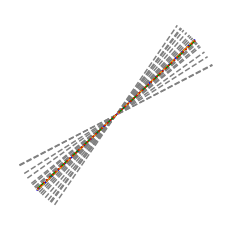

In [10]:
#plot point distribution and optimizers

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(gr_list)):
    plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.5', linestyle = 'dashed')

plt.plot([-sin_median[0,0], sin_median[0,0]],[-sin_median[1,0],sin_median[1,0]], color = 'blue', label = 'Sine Median')
plt.plot([-geodesic_median[0,0], geodesic_median[0,0]],[-geodesic_median[1,0],geodesic_median[1,0]], color = 'orange', linestyle = (0, (5, 1)), label = 'Geodesic Median')
plt.plot([-max_cosine[0,0], max_cosine[0,0]],[-max_cosine[1,0],max_cosine[1,0]], color = 'green', label = 'Maximum Cosine', linestyle = 'dashdot')
plt.plot([-flagmean[0,0], flagmean[0,0]],[-flagmean[1,0],flagmean[1,0]], color = 'red', linestyle = 'dotted', label = 'Flag Mean')
plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_aspect('equal')
plt.axis('off')

# Robustness Check

Plot the objective function values as a function of angle from the horizontal positive line. Red lines represent solutions for every trial with a different seed.

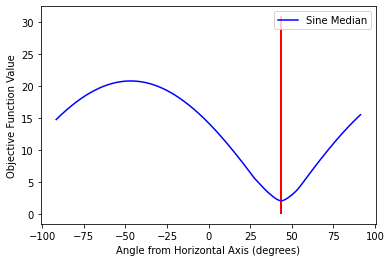

In [11]:
plt.plot(thetas_degrees, sin_err, label = 'Sine Median', color = 'blue', linestyle = 'solid')
for seed in range(200):
    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, k, n_its, 'sine', fast = False, seed = seed)
    plt.vlines(np.arctan(sin_median[1]/sin_median[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'solid')

plt.xlabel('Angle from Horizontal Axis (degrees)')
plt.ylabel('Objective Function Value')

plt.legend()
    


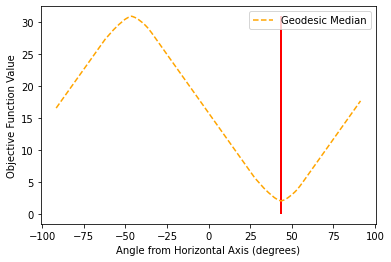

In [12]:
plt.plot(thetas_degrees, geo_err, label = 'Geodesic Median', color = 'orange', linestyle = 'dashed')
for seed in range(200):
    #calculate geodesic median
    geodesic_median, g_err = ca.irls_flag(gr_list, k, n_its, 'geodesic', fast = False, seed = seed)
    plt.vlines(np.arctan(geodesic_median[1]/geodesic_median[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'solid')

plt.xlabel('Angle from Horizontal Axis (degrees)')
plt.ylabel('Objective Function Value')

plt.legend()
    


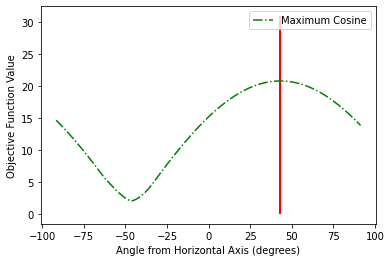

In [13]:
plt.plot(thetas_degrees, cos_err, label = 'Maximum Cosine', color = 'green', linestyle = 'dashdot')
for seed in range(200):
    #calculate geodesic median
    max_cosine, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', fast = False, seed = seed)
    plt.vlines(np.arctan(max_cosine[1]/max_cosine[0])*180/np.pi, 0, v_line_top, color = 'red')
    
plt.xlabel('Angle from Horizontal Axis (degrees)')
plt.ylabel('Objective Function Value')
plt.legend()
    

(-1.0, 1.0, -1.0, 1.0)

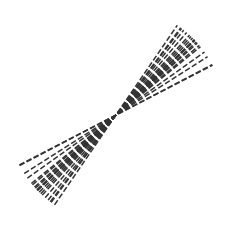

In [14]:
#only works with unique minimizer

weight_type = 'cosine'

if weight_type == 'cosine':
    optimum = np.max(cos_err)
elif weight_type == 'sine':
    optimum = np.min(sin_err)
elif weight_type == 'geodesic':
    optimum = np.min(geo_err)
bad_Ys = []
for seed in range(200):
    best, c_err = ca.irls_flag(gr_list, k, n_its, weight_type, fast = False, seed = seed)
    opt_fn_val = ca.calc_error_1_2(gr_list, best, weight_type)
    if opt_fn_val >  optimum +.1 or opt_fn_val < optimum - .1:
        print(opt_fn_val)
        print(seed)
        bad_seed= seed
        np.random.seed(seed)
        Y_raw = np.random.rand(2,1)-.5
        Y = np.linalg.qr(Y_raw)[0][:,:1]
        bad_Ys.append(Y)
    
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(gr_list)):
    plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.2', linestyle = 'dashed')

for Y in bad_Ys:
    plt.plot([-Y[0], Y[0]],[-Y[1],Y[1]], color = 'red', linestyle = 'solid', alpha= .3)
    

plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_aspect('equal')
plt.axis('off')

Text(0, 0.5, 'objective function value')

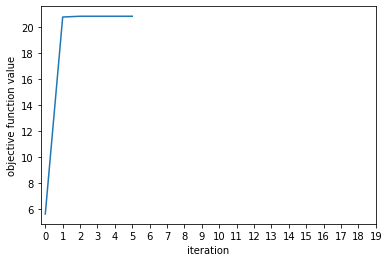

In [15]:
seed = 34
best, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
plt.plot(c_err[:20])
plt.xticks([i for i in range(20)])
plt.xlabel('iteration')
plt.ylabel('objective function value')